<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day07_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)

#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

In [7]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [8]:
def accuracy(actual,predicted):
    #get the series comparing the two series
    compared = actual == predicted
    correct_predictions = compared[ compared == True ]
    num_correct = len(correct_predictions)
    frac_correct = num_correct/len(actual)
    return frac_correct

In [9]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    return test_data.apply(classify_kNN,args=(train_data,k),axis=1)

In [10]:
predictions5NN = classify_all_kNN(test_data,train_data,5)
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "  ", predictions5NN.iloc[i] )

acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

ACTUAL		PREDICTIONS
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-virginica    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
accuracy: 0.9


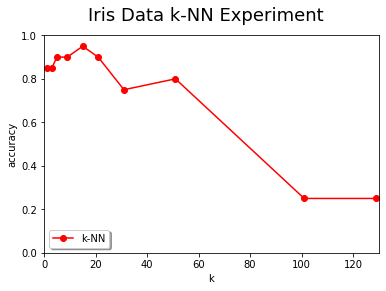

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()